In [38]:
import pandas
import matplotlib.pyplot as plt

## Terms in phases

In [39]:
df1 = pandas.read_csv('D:/BG/Paper_2/analyses-2/Labelling/Phases-mixture.csv')
print(df1['Phases'].value_counts())
df1

Support Activities            4478
Software                      3711
Tooling and Machining         1259
Materials                      839
Supply Chain and Logistics     653
Design                         341
Production and Assembling      311
General Skills                 222
Ideation and Development       201
Name: Phases, dtype: int64


,SkillId,Skill_US,Phases
0,3,anxiety reduction,Support Activities
1,5,injections,Software
2,11,hm customs and excise,Support Activities
3,12,behavioral health,Support Activities
4,13,energy management,Support Activities
...,...,...,...
12010,18031,latex,Software
12011,18034,rapid recovery,Software
12012,18035,react javascript,Software
12013,18036,virtual reality (vr),Software


## Dictionary of phases

In [41]:
Design = df1.loc[df1['Phases'] == 'Design','Skill_US'].tolist()
General = df1.loc[df1['Phases'] == 'General Skills','Skill_US'].tolist()
Ideation = df1.loc[df1['Phases'] == 'Ideation and Development','Skill_US'].tolist()
Materials = df1.loc[df1['Phases'] == 'Materials','Skill_US'].tolist()
Production = df1.loc[df1['Phases'] == 'Production and Assembling','Skill_US'].tolist()
Software = df1.loc[df1['Phases'] == 'Software','Skill_US'].tolist()
Supply = df1.loc[df1['Phases'] == 'Supply Chain and Logistics','Skill_US'].tolist()
Support = df1.loc[df1['Phases'] == 'Support Activities','Skill_US'].tolist()
Tooling = df1.loc[df1['Phases'] == 'Tooling and Machining','Skill_US'].tolist()

mydict = {'Design':Design,'General Skills':General,'Ideation and Development':Ideation,'Materials':Materials,'Production and Assembling':Production,'Software':Software,'Supply Chain and Logistics':Supply,'Support Activities':Support,'Tooling and Machining':Tooling,}

## Service Bureaus (SBs)

In [42]:
SB = pandas.read_csv('D:/BG/Paper_2/analyses-2/SB/SB-Data.csv')
SB.columns

Index(['BGTJobId', 'JobDate', 'CleanTitle', 'CanonTitle', 'SOC', 'SOCName',
       'ONET', 'ONETName', 'Employer', 'Sector', 'SectorName', 'NAICS3',
       'NAICS4', 'NAICS5', 'NAICS6', 'City', 'County', 'State', 'Lat', 'Lon',
       'Edu', 'MaxEdu', 'Degree', 'MaxDegree', 'Exp', 'MaxExp', 'MinSalary',
       'MaxSalary', 'MinHrlySalary', 'MaxHrlySalary', 'PayFrequency',
       'SalaryType', 'JobHours', 'SOC2', 'SOC4', 'SOC5', 'SK',
       'Employer_clean', 'n_terms', 'SK_without', 'TECH', 'occupation',
       'firm1', 'firm2', 'firm', 'plant', 'plant_5'],
      dtype='object')

## Calculating the number of terms in each phase for Service Bureaus (SB)

In [43]:
df2 = SB.copy()
df2.SK = df2.SK.str.split(',')
df2['Length'] = df2.SK.str.len()
df2 = df2[['BGTJobId','SK','TECH','occupation','Length']]
mylist = df2[['BGTJobId','SK']].values.tolist()
print(mylist[0:5])
df3 = []
for job in mylist:
  for phase in mydict:
    c = 0
    for phrase in mydict[phase]:
      c = c + job[1].count(phrase)
    df3.append([job[0],phase,c])
df3 =  pandas.DataFrame(df3,columns=['BGTJobId','Phases','Count'])
df3 = df3.pivot(index='BGTJobId',columns='Phases',values='Count')
df3 = df3.merge(df2,left_on='BGTJobId',right_on='BGTJobId')
df3 = df3[['BGTJobId','SK','TECH','occupation']+list(mydict.keys())+['Length']]
df3

[[351932089, ['troubleshooting', 'verbal / oral communication', 'communication skills', 'problem solving', 'detail-oriented', 'mechanical engineering', 'legal compliance', 'civil engineering', 'design modification', 'writing', 'carpentry']], [352056182, ['machining', 'welding', 'industrial mechanic experience', 'mechanical maintenance', 'hydraulics', 'technical training', 'repair', 'carpentry']], [352057607, ['mechanical maintenance', 'carpentry']], [352058746, ['electrical devices', 'carpentry']], [352058822, ['budgeting', 'staff management', 'troubleshooting', 'verbal / oral communication', 'communication skills', 'writing', 'carpentry', 'civil engineering', 'design modification', 'problem solving', 'detail-oriented', 'mechanical engineering', 'legal compliance']]]


,BGTJobId,SK,TECH,occupation,Design,General Skills,Ideation and Development,Materials,Production and Assembling,Software,Supply Chain and Logistics,Support Activities,Tooling and Machining,Length
0,351932089,"[troubleshooting, verbal / oral communication,...",TM,Engineer,2,6,0,0,0,0,0,1,2,11
1,352056182,"[machining, welding, industrial mechanic exper...",TM,Technician,0,0,0,0,1,0,0,1,6,8
2,352057607,"[mechanical maintenance, carpentry]",TM,Engineer,0,0,0,0,0,0,0,0,2,2
3,352058746,"[electrical devices, carpentry]",TM,Technician,0,0,0,0,0,0,0,0,2,2
4,352058822,"[budgeting, staff management, troubleshooting,...",TM,Manager,2,6,0,0,0,0,0,3,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12440,38688610810,"[sample preparation, quality assurance and con...",TM,Operator,0,0,0,0,0,0,0,5,3,8
12441,38688744068,"[manufacturing processes, material requirement...",TM,Manager,2,6,0,0,1,2,9,6,1,27
12442,38689002966,"[algebra, microsoft excel, manual dexterity, c...",AM,Operator,1,4,0,0,0,2,1,2,2,12
12443,38689119712,[international traffic in arms regulations (it...,TM,Technician,0,1,0,0,0,0,0,1,3,5


## To binary

In [44]:
df4 = df3.copy()
for phase in list(mydict.keys()):
  df4.loc[df4[phase]>0,phase] = 1
df4['Phases-Sum'] = df4[list(mydict.keys())].sum(axis=1)
df4['Primary-Sum'] = df4[['Ideation and Development','Design','Materials','Tooling and Machining','Production and Assembling','Supply Chain and Logistics']].sum(axis=1)
df4

,BGTJobId,SK,TECH,occupation,Design,General Skills,Ideation and Development,Materials,Production and Assembling,Software,Supply Chain and Logistics,Support Activities,Tooling and Machining,Length,Phases-Sum,Primary-Sum
0,351932089,"[troubleshooting, verbal / oral communication,...",TM,Engineer,1,1,0,0,0,0,0,1,1,11,4,2
1,352056182,"[machining, welding, industrial mechanic exper...",TM,Technician,0,0,0,0,1,0,0,1,1,8,3,2
2,352057607,"[mechanical maintenance, carpentry]",TM,Engineer,0,0,0,0,0,0,0,0,1,2,1,1
3,352058746,"[electrical devices, carpentry]",TM,Technician,0,0,0,0,0,0,0,0,1,2,1,1
4,352058822,"[budgeting, staff management, troubleshooting,...",TM,Manager,1,1,0,0,0,0,0,1,1,13,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12440,38688610810,"[sample preparation, quality assurance and con...",TM,Operator,0,0,0,0,0,0,0,1,1,8,2,1
12441,38688744068,"[manufacturing processes, material requirement...",TM,Manager,1,1,0,0,1,1,1,1,1,27,7,4
12442,38689002966,"[algebra, microsoft excel, manual dexterity, c...",AM,Operator,1,1,0,0,0,1,1,1,1,12,6,3
12443,38689119712,[international traffic in arms regulations (it...,TM,Technician,0,1,0,0,0,0,0,1,1,5,3,1


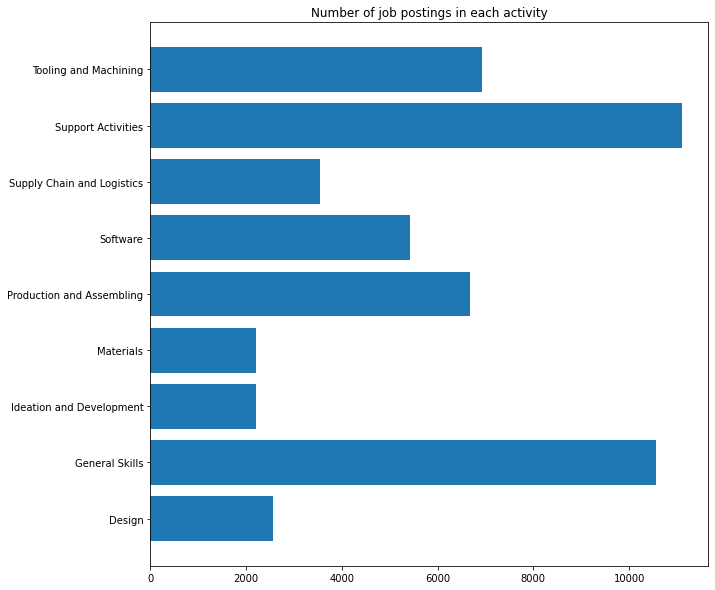

In [45]:
fig = plt.figure(figsize=(10,10))
plt.barh(list(mydict.keys()),df4[list(mydict.keys())].sum(axis=0))
plt.title('Number of job postings in each activity')
plt.show()

## Distribution of the number of primary activities per job posting

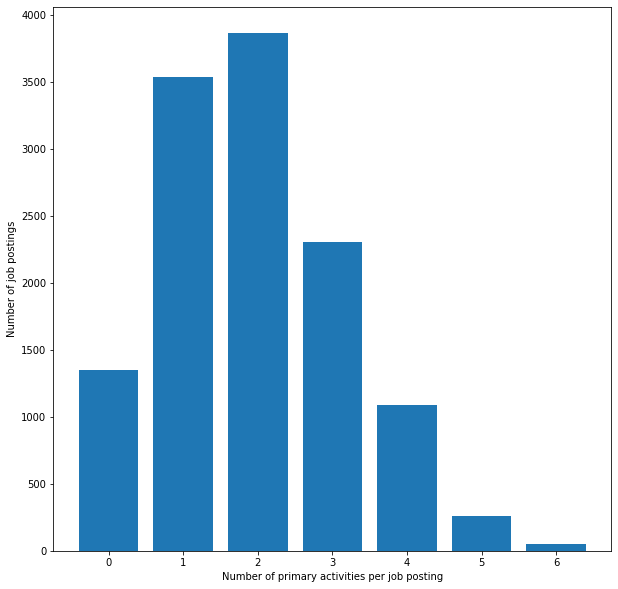

In [46]:
fig = plt.figure(figsize=(10,10))
plt.bar(df4.groupby(['Primary-Sum'])['BGTJobId'].count().index.to_list(),df4.groupby(['Primary-Sum'])['BGTJobId'].count())
plt.xlabel('Number of primary activities per job posting')
plt.ylabel('Number of job postings')
plt.show()

## Mean of the number of primary activities per job posting by technology and occupation

In [47]:
df4.groupby(['TECH','occupation'])['Primary-Sum'].mean().unstack('TECH').reindex(['Manager','Engineer','Technician','Operator'],axis=0)

TECH,AM,TM
occupation,,
Manager,2.567708,1.384316
Engineer,3.857778,2.667653
Technician,2.690909,2.339203
Operator,2.611650,1.625090
